# 基本设置

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 建立数据集

- torch.normal()在这里返回的是大小为100x2的Tensor，每个元素的标准差为1(通过normal的第二个参数设置获得)。
- torch.cat()拼接Tensor，第二个参数表示拼接的维度。0表示为按纵向拼接，这里拼接后的大小为400x2，1表示横向拼接，该参数默认为0。
- 输入模型的数据应该是浮点型，类别标签为整型。这里通过type()进行设置。

In [2]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer
print(x)
y

tensor([[ 1.8030,  2.2405],
        [ 1.8906,  3.0952],
        [ 3.2045,  1.9989],
        [ 2.1082,  2.0296],
        [ 1.9995,  2.0577],
        [ 3.2311,  3.9840],
        [ 2.9935,  0.0397],
        [ 0.8444,  1.0653],
        [ 1.2999,  0.8268],
        [ 2.1055,  2.8388],
        [ 0.9329,  1.2564],
        [ 0.5146,  0.4201],
        [ 1.6103,  2.2856],
        [ 2.0251,  0.7448],
        [ 1.4352,  0.5612],
        [ 2.3697,  0.6094],
        [ 3.3568,  1.7007],
        [ 1.6690,  1.2772],
        [ 2.6932,  1.3407],
        [ 1.9401,  1.6682],
        [ 2.2969,  1.1695],
        [ 0.6752,  1.6078],
        [ 1.3165,  1.9287],
        [ 0.6932,  2.6967],
        [ 1.9025,  1.1691],
        [ 1.2369,  1.0775],
        [ 1.8080,  2.5373],
        [ 2.1742,  1.2463],
        [ 1.7160,  2.9101],
        [ 1.4913, -0.4501],
        [ 0.9485,  3.4572],
        [ 1.0721,  2.9699],
        [ 2.7230,  1.3731],
        [ 1.9207,  1.0822],
        [ 1.3425,  1.5688],
        [ 2.0268,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1])

In [3]:
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
print(x)
y

tensor([[ 1.8030,  2.2405],
        [ 1.8906,  3.0952],
        [ 3.2045,  1.9989],
        [ 2.1082,  2.0296],
        [ 1.9995,  2.0577],
        [ 3.2311,  3.9840],
        [ 2.9935,  0.0397],
        [ 0.8444,  1.0653],
        [ 1.2999,  0.8268],
        [ 2.1055,  2.8388],
        [ 0.9329,  1.2564],
        [ 0.5146,  0.4201],
        [ 1.6103,  2.2856],
        [ 2.0251,  0.7448],
        [ 1.4352,  0.5612],
        [ 2.3697,  0.6094],
        [ 3.3568,  1.7007],
        [ 1.6690,  1.2772],
        [ 2.6932,  1.3407],
        [ 1.9401,  1.6682],
        [ 2.2969,  1.1695],
        [ 0.6752,  1.6078],
        [ 1.3165,  1.9287],
        [ 0.6932,  2.6967],
        [ 1.9025,  1.1691],
        [ 1.2369,  1.0775],
        [ 1.8080,  2.5373],
        [ 2.1742,  1.2463],
        [ 1.7160,  2.9101],
        [ 1.4913, -0.4501],
        [ 0.9485,  3.4572],
        [ 1.0721,  2.9699],
        [ 2.7230,  1.3731],
        [ 1.9207,  1.0822],
        [ 1.3425,  1.5688],
        [ 2.0268,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1])

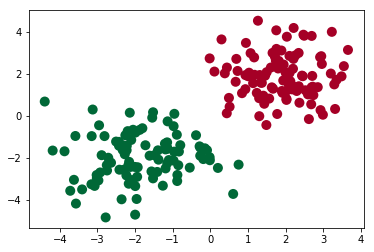

In [4]:
# draw the data
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# 建立神经网络

In [ ]:
class Net(nn.Module):
    #定义Net的初始化函数，这个函数定义了该神经网络的基本结构
    def __init__(self):
        super(Net, self).__init__() #复制并使用Net的父类的初始化方法，即先运行nn.Module的初始化函数
        self.conv1 = nn.Conv2d(1, 6, 5) # 定义conv1函数的是图像卷积函数：输入为图像（1个频道，即灰度图）,输出为 6张特征图, 卷积核为5x5正方形
        self.conv2 = nn.Conv2d(6, 16, 5)# 定义conv2函数的是图像卷积函数：输入为6张特征图,输出为16张特征图, 卷积核为5x5正方形
        self.fc1   = nn.Linear(16*5*5, 120) # 定义fc1（fullconnect）全连接函数1为线性函数：y = Wx + b，并将16*5*5个节点连接到120个节点上。
        self.fc2   = nn.Linear(120, 84)#定义fc2（fullconnect）全连接函数2为线性函数：y = Wx + b，并将120个节点连接到84个节点上。
        self.fc3   = nn.Linear(84, 10)#定义fc3（fullconnect）全连接函数3为线性函数：y = Wx + b，并将84个节点连接到10个节点上。

    #定义该神经网络的向前传播函数，该函数必须定义，一旦定义成功，向后传播函数也会自动生成（autograd）
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) #输入x经过卷积conv1之后，经过激活函数ReLU（原来这个词是激活函数的意思），使用2x2的窗口进行最大池化Max pooling，然后更新到x。
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) #输入x经过卷积conv2之后，经过激活函数ReLU，使用2x2的窗口进行最大池化Max pooling，然后更新到x。
        x = x.view(-1, self.num_flat_features(x)) #view函数将张量x变形成一维的向量形式，总特征数并不改变，为接下来的全连接作准备。
        x = F.relu(self.fc1(x)) #输入x经过全连接1，再经过ReLU激活函数，然后更新x
        x = F.relu(self.fc2(x)) #输入x经过全连接2，再经过ReLU激活函数，然后更新x
        x = self.fc3(x) #输入x经过全连接3，然后更新x
        return x

    #使用num_flat_features函数计算张量x的总特征量（把每个数字都看出是一个特征，即特征总量），比如x是4*2*2的张量，那么它的特征总量就是16。
    def num_flat_features(self, x):
        size = x.size()[1:] # 这里为什么要使用[1:],是因为pytorch只接受批输入，也就是说一次性输入好几张图片，那么输入数据张量的维度自然上升到了4维。【1:】让我们把注意力放在后3维上面
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [6]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [7]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


# 训练网络

- 在这里我们是进行分类任务，所以我们采用交叉熵torch.nn.CrossEntropyLoss()作为损失函数。
- 损失函数中包含了LogSoftMax的计算，所以直接将网络全连接层的输出输进损失函数即可。其内部运行原理见下式：
> - loss(x, class) = -log(exp(x[class]) / (\sum_j exp(x[j])))
               = -x[class] + log(\sum_j exp(x[j]))

In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

In [9]:
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

# 可视化训练过程

- torch.max()返回的是两个Variable，第一个Variable存的是最大值，第二个存的是其对应的位置索引index。
- 这里我们想要得到的是索引，所以后面用[1]。

D:\software\conda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


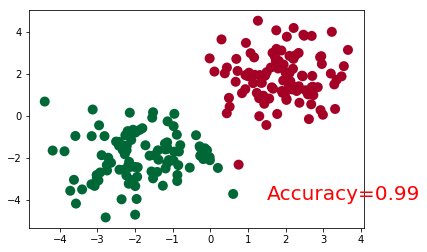

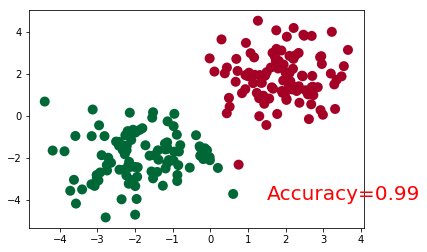

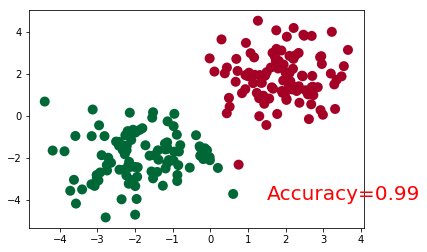

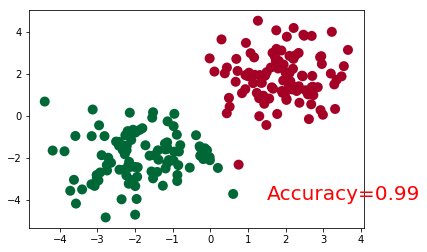

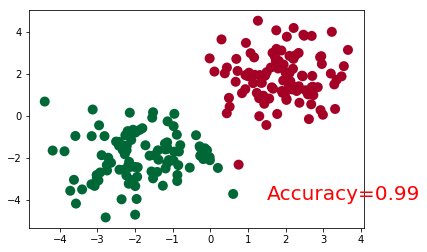

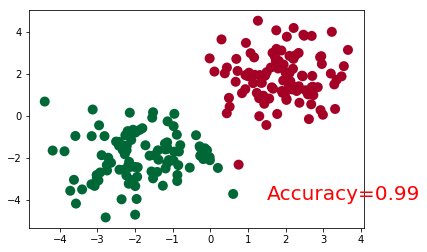

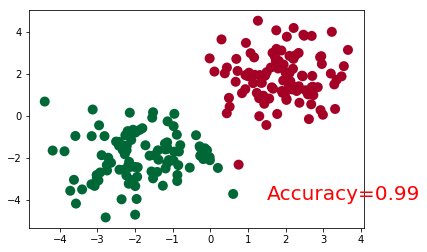

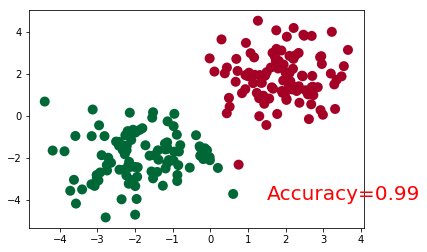

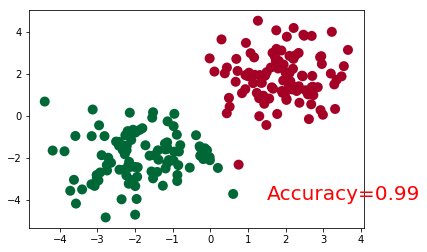

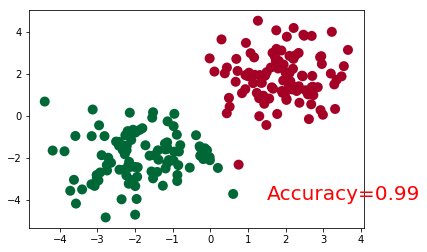

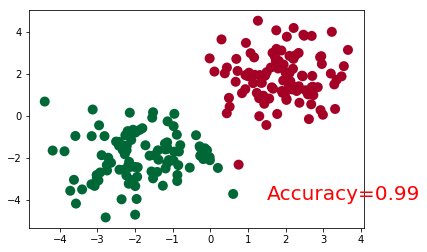

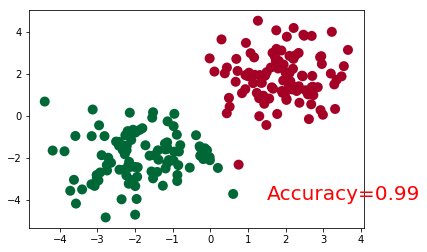

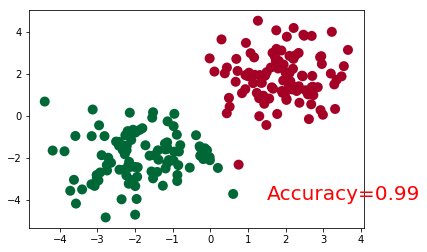

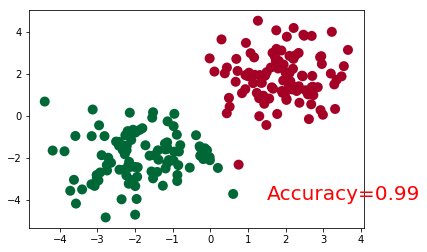

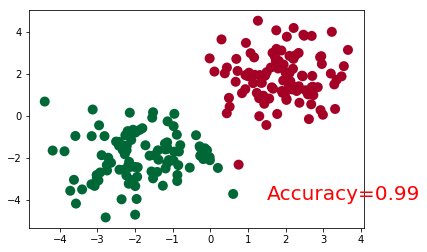

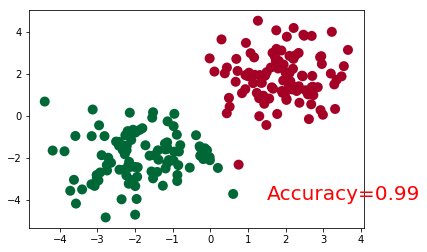

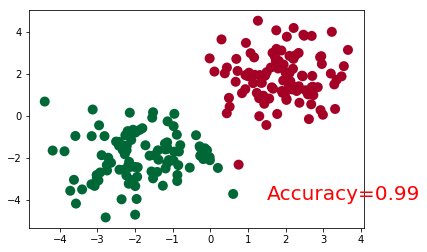

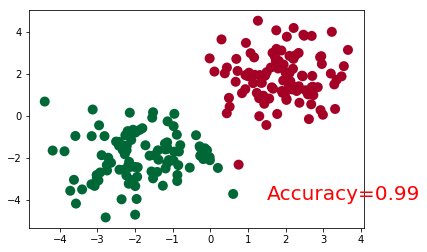

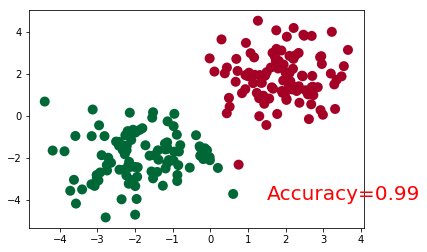

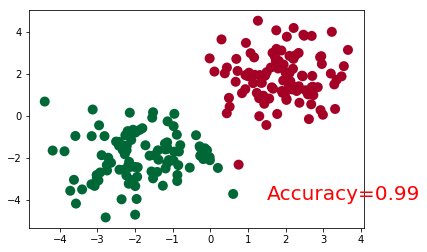

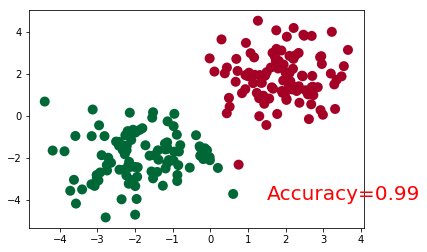

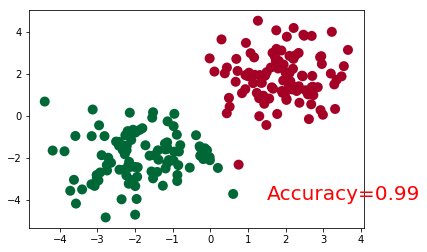

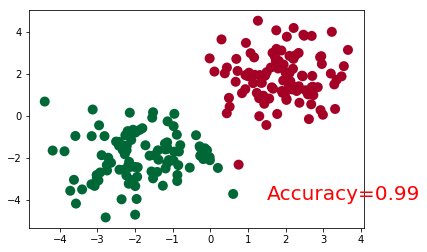

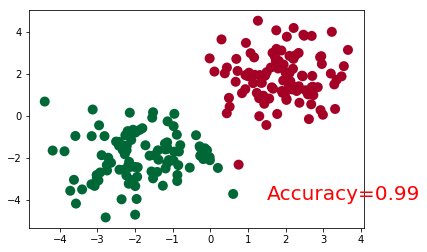

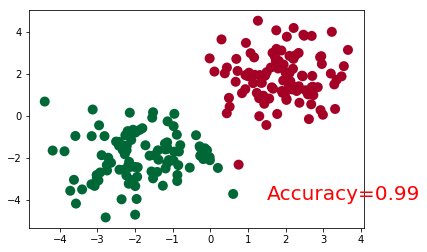

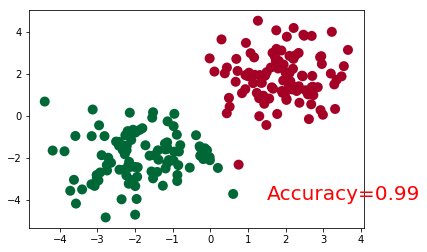

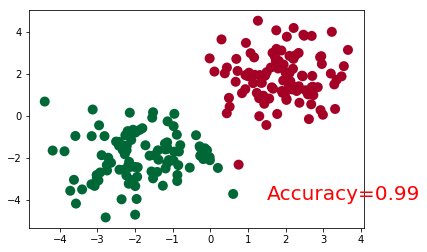

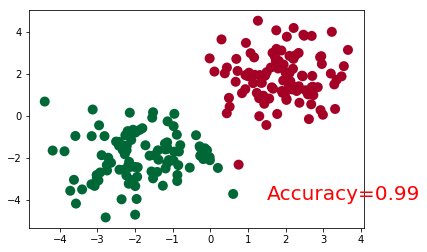

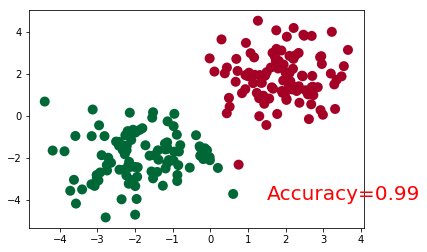

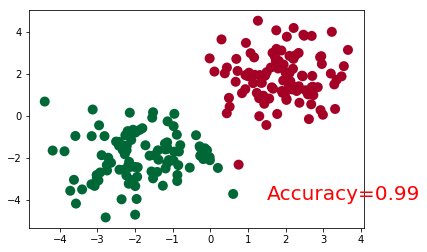

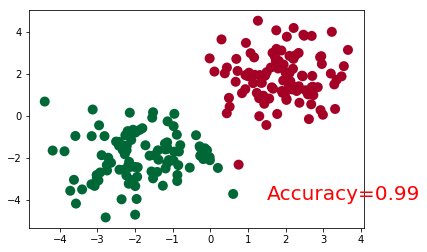

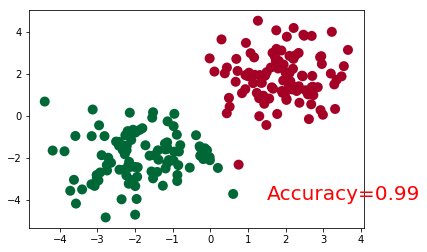

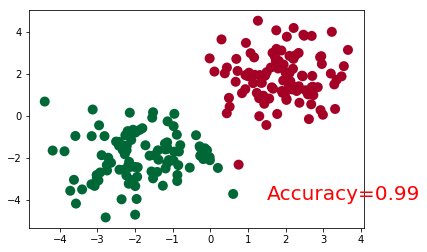

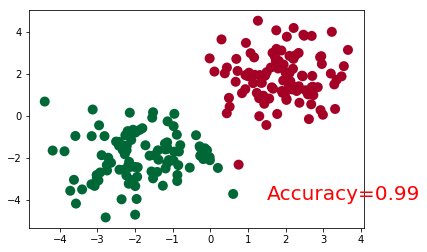

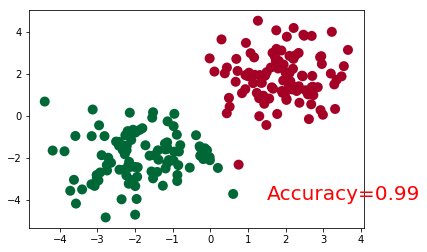

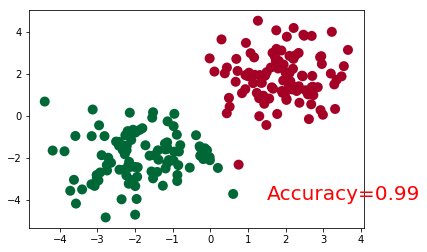

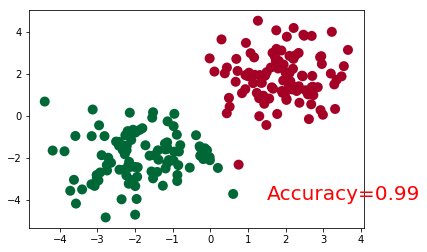

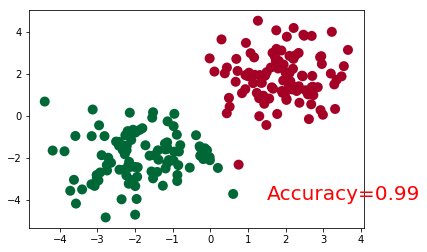

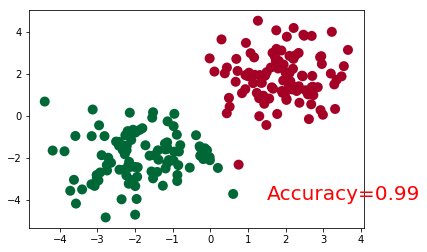

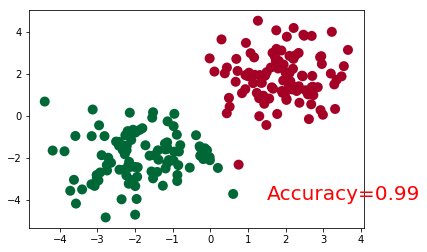

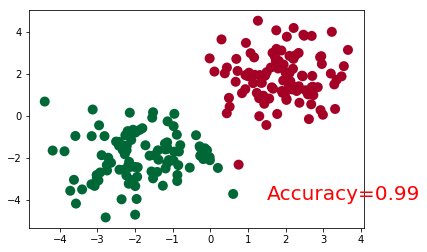

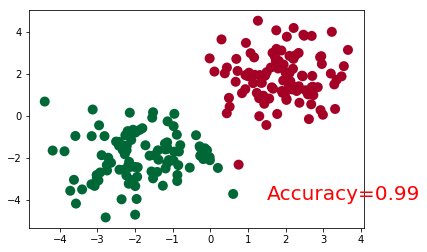

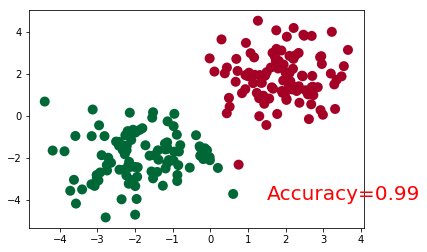

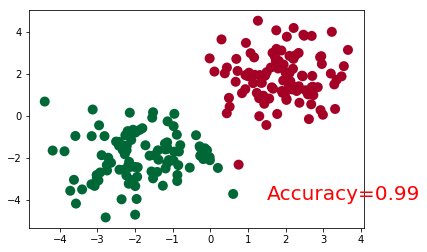

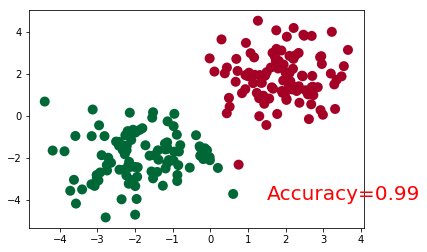

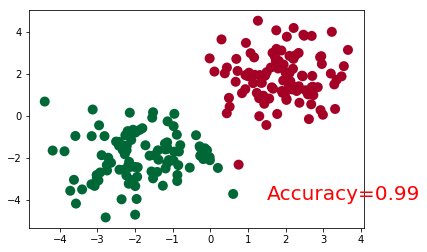

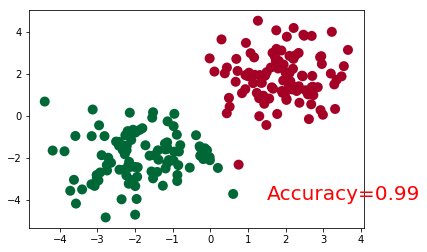

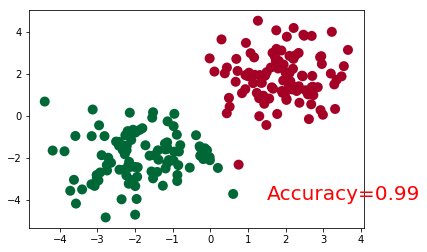

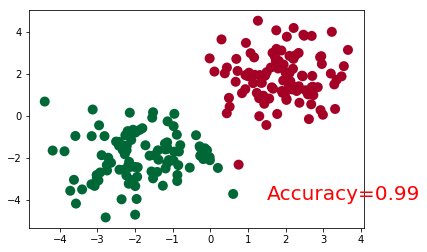

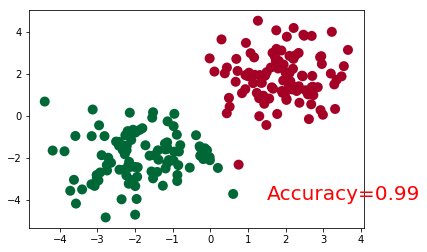

In [11]:
plt.ion()   # something about plotting

for t in range(100):
    ...

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()